<a href="https://colab.research.google.com/github/Venkateshyakkala007/CarPricePredicition/blob/main/captcha_prediction_using_ml_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -LO https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -qq captcha_images_v2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8863k  100 8863k    0     0  6884k      0  0:00:01  0:00:01 --:--:-- 22.7M


In [2]:
!unzip -qq CaptchaFiles.zip

In [3]:
path1 = './CaptchaFiles/035M.png'
path2 = './CaptchaFiles/03Az.png'


In [11]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [12]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')

    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')

    plt.axis('off')

In [13]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)


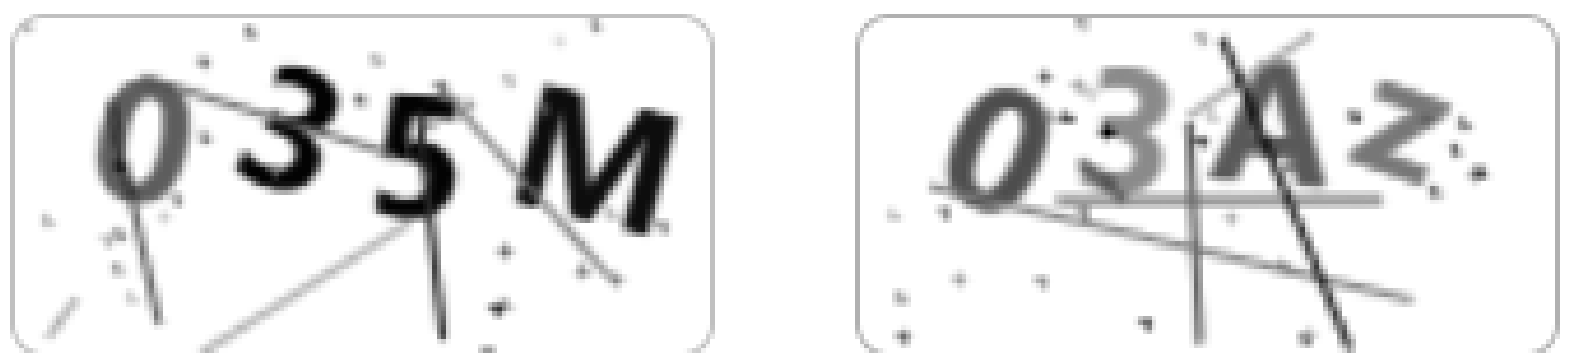

In [14]:
plot_(img1, img2)


In [15]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

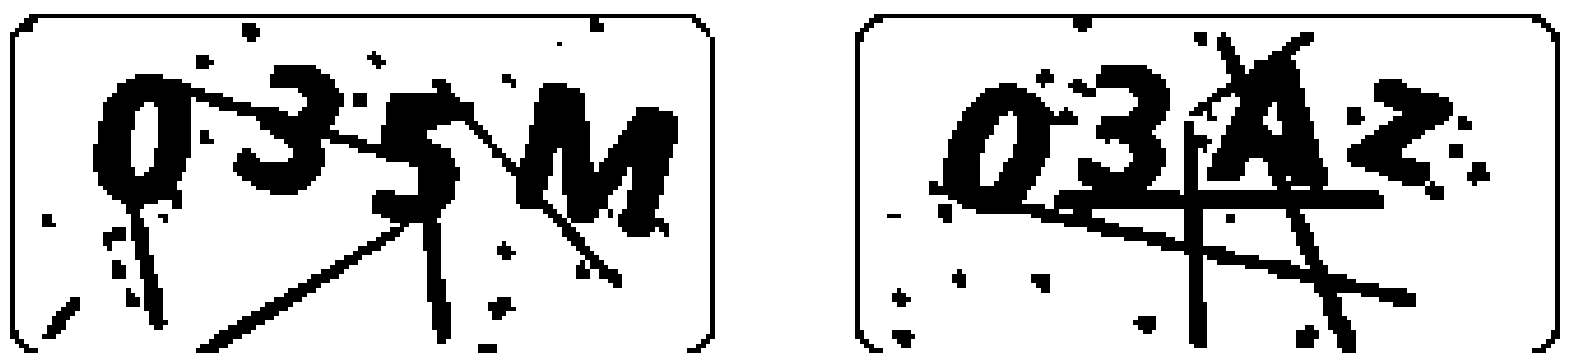

In [16]:
plot_(thresh_img1,thresh_img2)

In [17]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

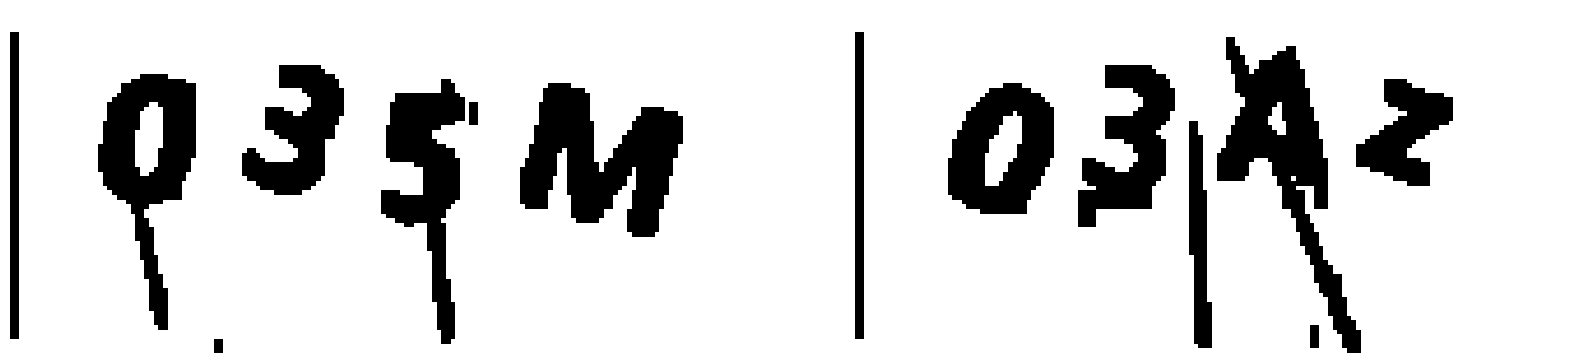

In [18]:
plot_(close_img1,close_img2)

In [19]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

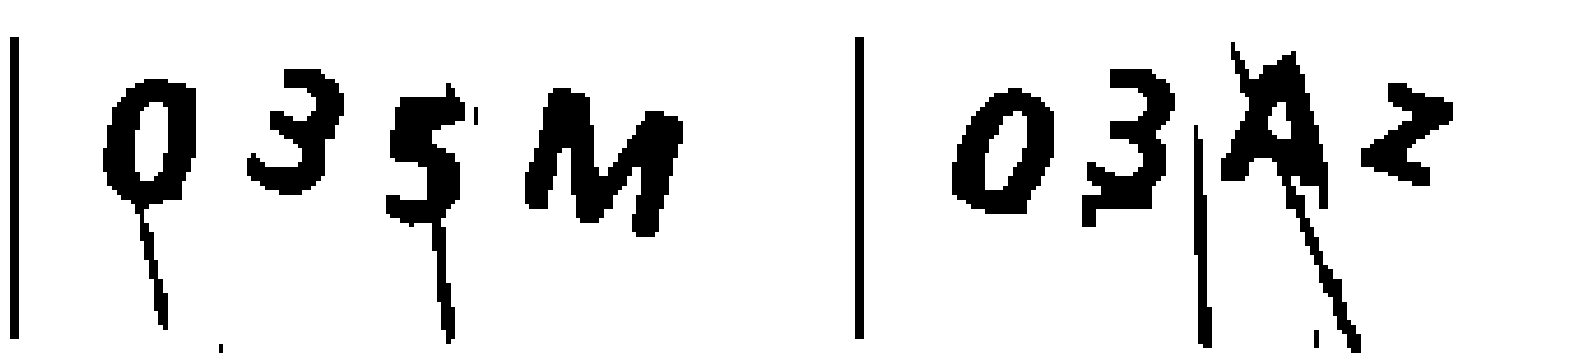

In [20]:
plot_(dilate_img1,dilate_img2)

In [21]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

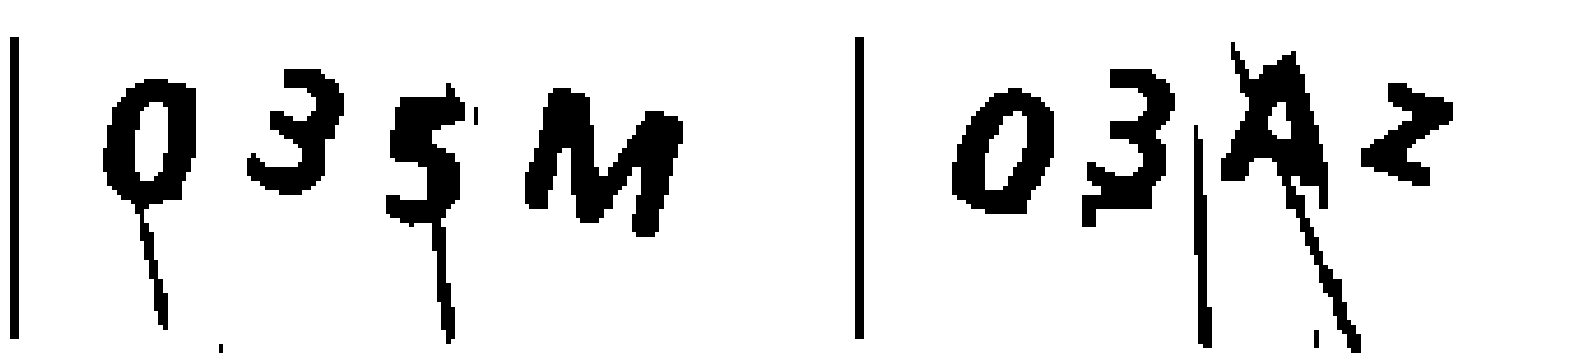

In [22]:
plot_(gauss_img1,gauss_img2)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
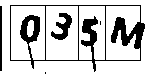

In [23]:
cv2.rectangle(gauss_img1, (10,5), (45,60), 0, 1)
cv2.rectangle(gauss_img1, (45,5), (78,60), 0, 1)
cv2.rectangle(gauss_img1, (78,5), (105,60), 0, 1)
cv2.rectangle(gauss_img1, (105,5), (140,60),0, 1)
# cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
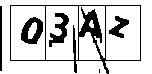

In [24]:

cv2.rectangle(gauss_img2, (10,5), (45,60), 0, 1)
cv2.rectangle(gauss_img2, (45,5), (78,60), 0, 1)
cv2.rectangle(gauss_img2, (78,5), (105,60), 0, 1)
cv2.rectangle(gauss_img2, (105,5), (140,60),0, 1)

In [25]:
path = './CaptchaFiles/'


In [26]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)


In [27]:
!pip install keras tensorflow

In [28]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [58]:
X = []
y = []
max_width = 35
cnt = 0
# output_path = './character_images/'
def pad_image(img, target_width):
    h, w = img.shape
    pad_width = target_width - w
    padded_img = cv2.copyMakeBorder(img, 0, 0, 0, pad_width, cv2.BORDER_CONSTANT, value=255)
    return padded_img

for image in os.listdir(path) :
    # print(image[5:])

    if image[5:] != 'png' :
        cnt += 1
        continue

    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[5:60, 10:45], img[5:60, 45:78], img[5:60, 78:105], img[5:60, 105:140]]
    label = image.split('.')[0]

    for i in range(4) :
        padded_img = pad_image(image_list[i], max_width)
        X.append(img_to_array(Image.fromarray(padded_img)))

        if i < len(label):
          y.append(label[i])
        else:
          y.append('?')

        output_path = f"./character_images/{label[i]}.png"

        cv2.imwrite(output_path,padded_img)

        # y.append(image[i])


X = np.array(X)
y = np.array(y)
print(cnt)


5


In [34]:
X.shape

(5952, 55, 35, 1)

In [35]:
X /= 255.0

[]

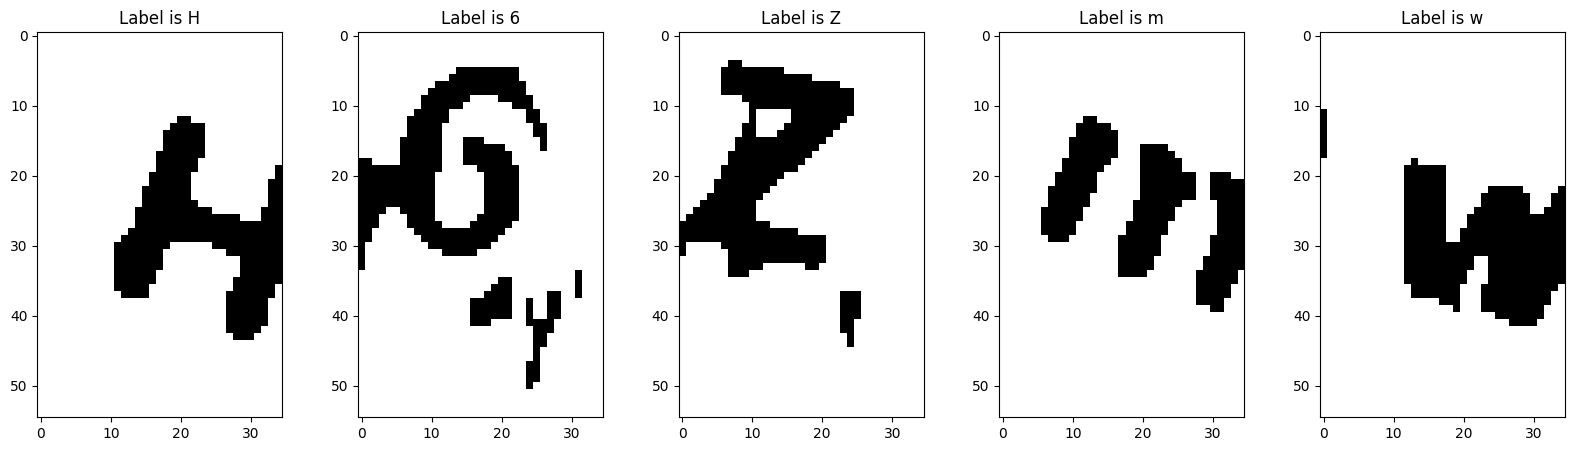

In [36]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [37]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of Q : 89
Occurance count of G : 94
Occurance count of 9 : 111
Occurance count of 3 : 92
Occurance count of a : 97
Occurance count of Y : 100
Occurance count of x : 109
Occurance count of 0 : 116
Occurance count of N : 112
Occurance count of A : 98
Occurance count of f : 98
Occurance count of n : 106
Occurance count of H : 90
Occurance count of w : 108
Occurance count of s : 107
Occurance count of j : 109
Occurance count of 4 : 104
Occurance count of P : 68
Occurance count of E : 92
Occurance count of D : 1
Occurance count of o : 85
Occurance count of 7 : 123
Occurance count of r : 110
Occurance count of U : 1
Occurance count of F : 114
Occurance count of 5 : 109
Occurance count of C : 123
Occurance count of q : 87
Occurance count of e : 99
Occurance count of T : 94
Occurance count of J : 115
Occurance count of p : 134
Occurance count of c : 110
Occurance count of V : 7
Occurance count of i : 103
Occurance count of I : 84
Occurance count of Z : 96
Occurance count of K :

In [38]:
temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})


<ipython-input-39-c477dcff4fad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

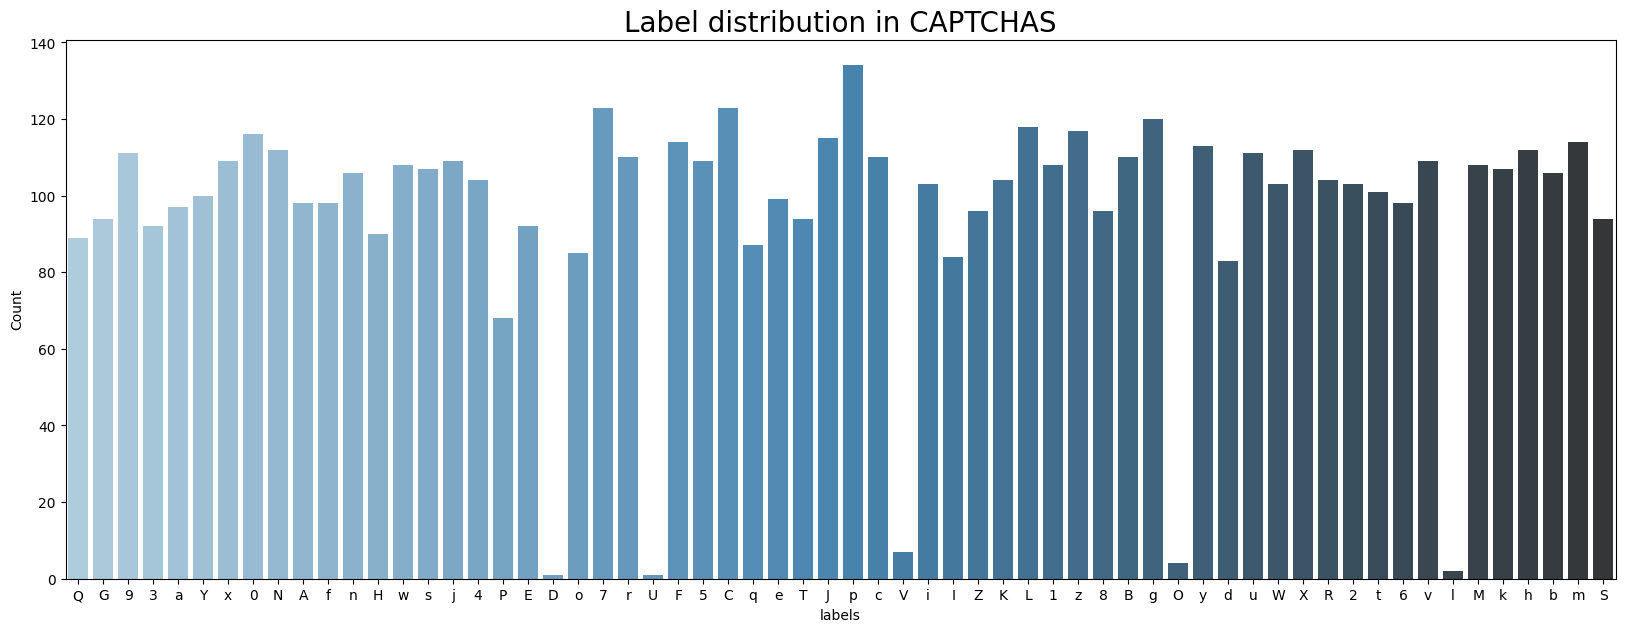

In [39]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse_output = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [41]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 6
label : 6
Count : 98


In [42]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [43]:
print(X.shape)
print(y_one_hot.shape)

(5952, 55, 35, 1)
(5952, 62)


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)


In [46]:
y_temp = np.argmax(y_test, axis = 1)


In [47]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

<ipython-input-48-61f772194c12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in test set')

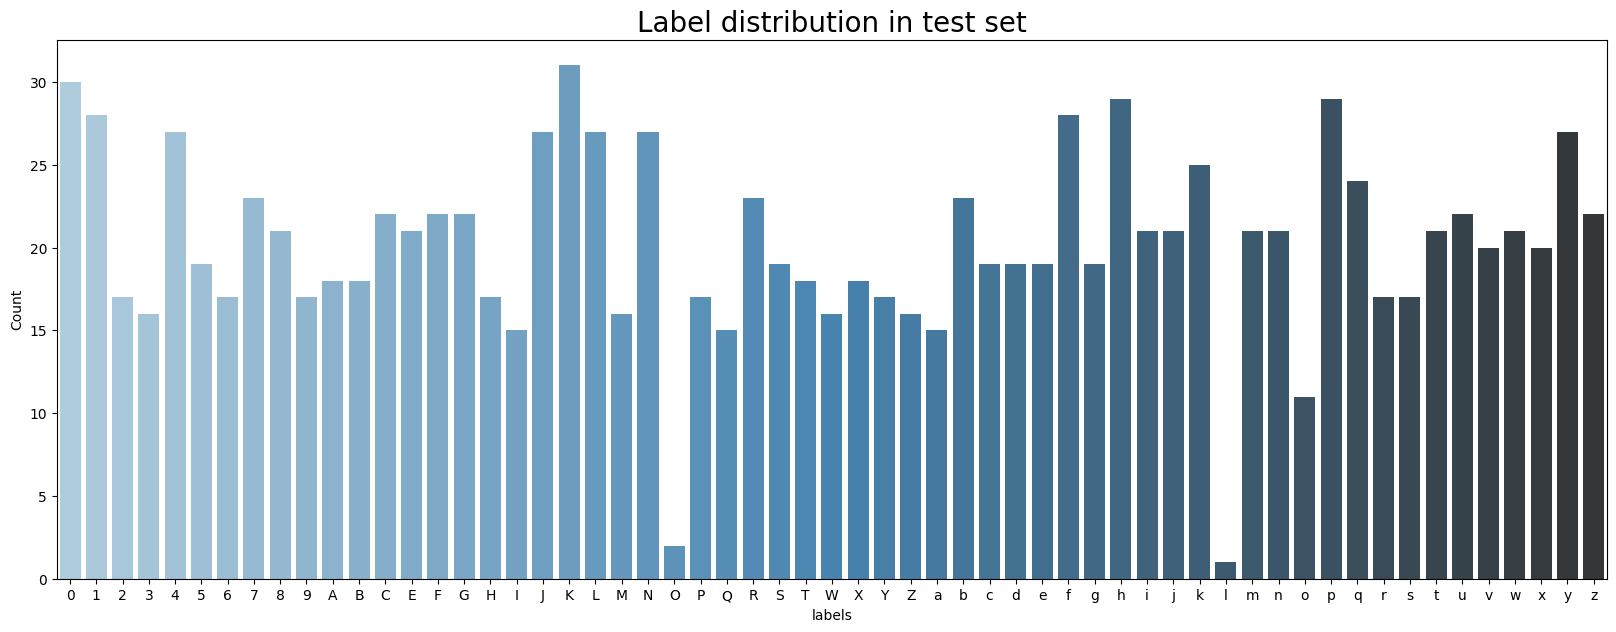

In [48]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input


In [50]:
def conv_layer (filterx) :

    model = Sequential()

    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

    return model

In [51]:
def dens_layer (hiddenx) :

    model = Sequential()

    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    return model


In [52]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :

    model = Sequential()
    model.add(Input((40, 20, 1,)))

    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))

    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))

    model.add(Dense(19, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [55]:
X_train = np.reshape(X_train, (4761, 55*35*1)) #(5952, 55, 35, 1)

In [56]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7904, 800)
(7904, 19)


In [ ]:
X_train = np.reshape(X_train, (7904, 40, 20, 1))

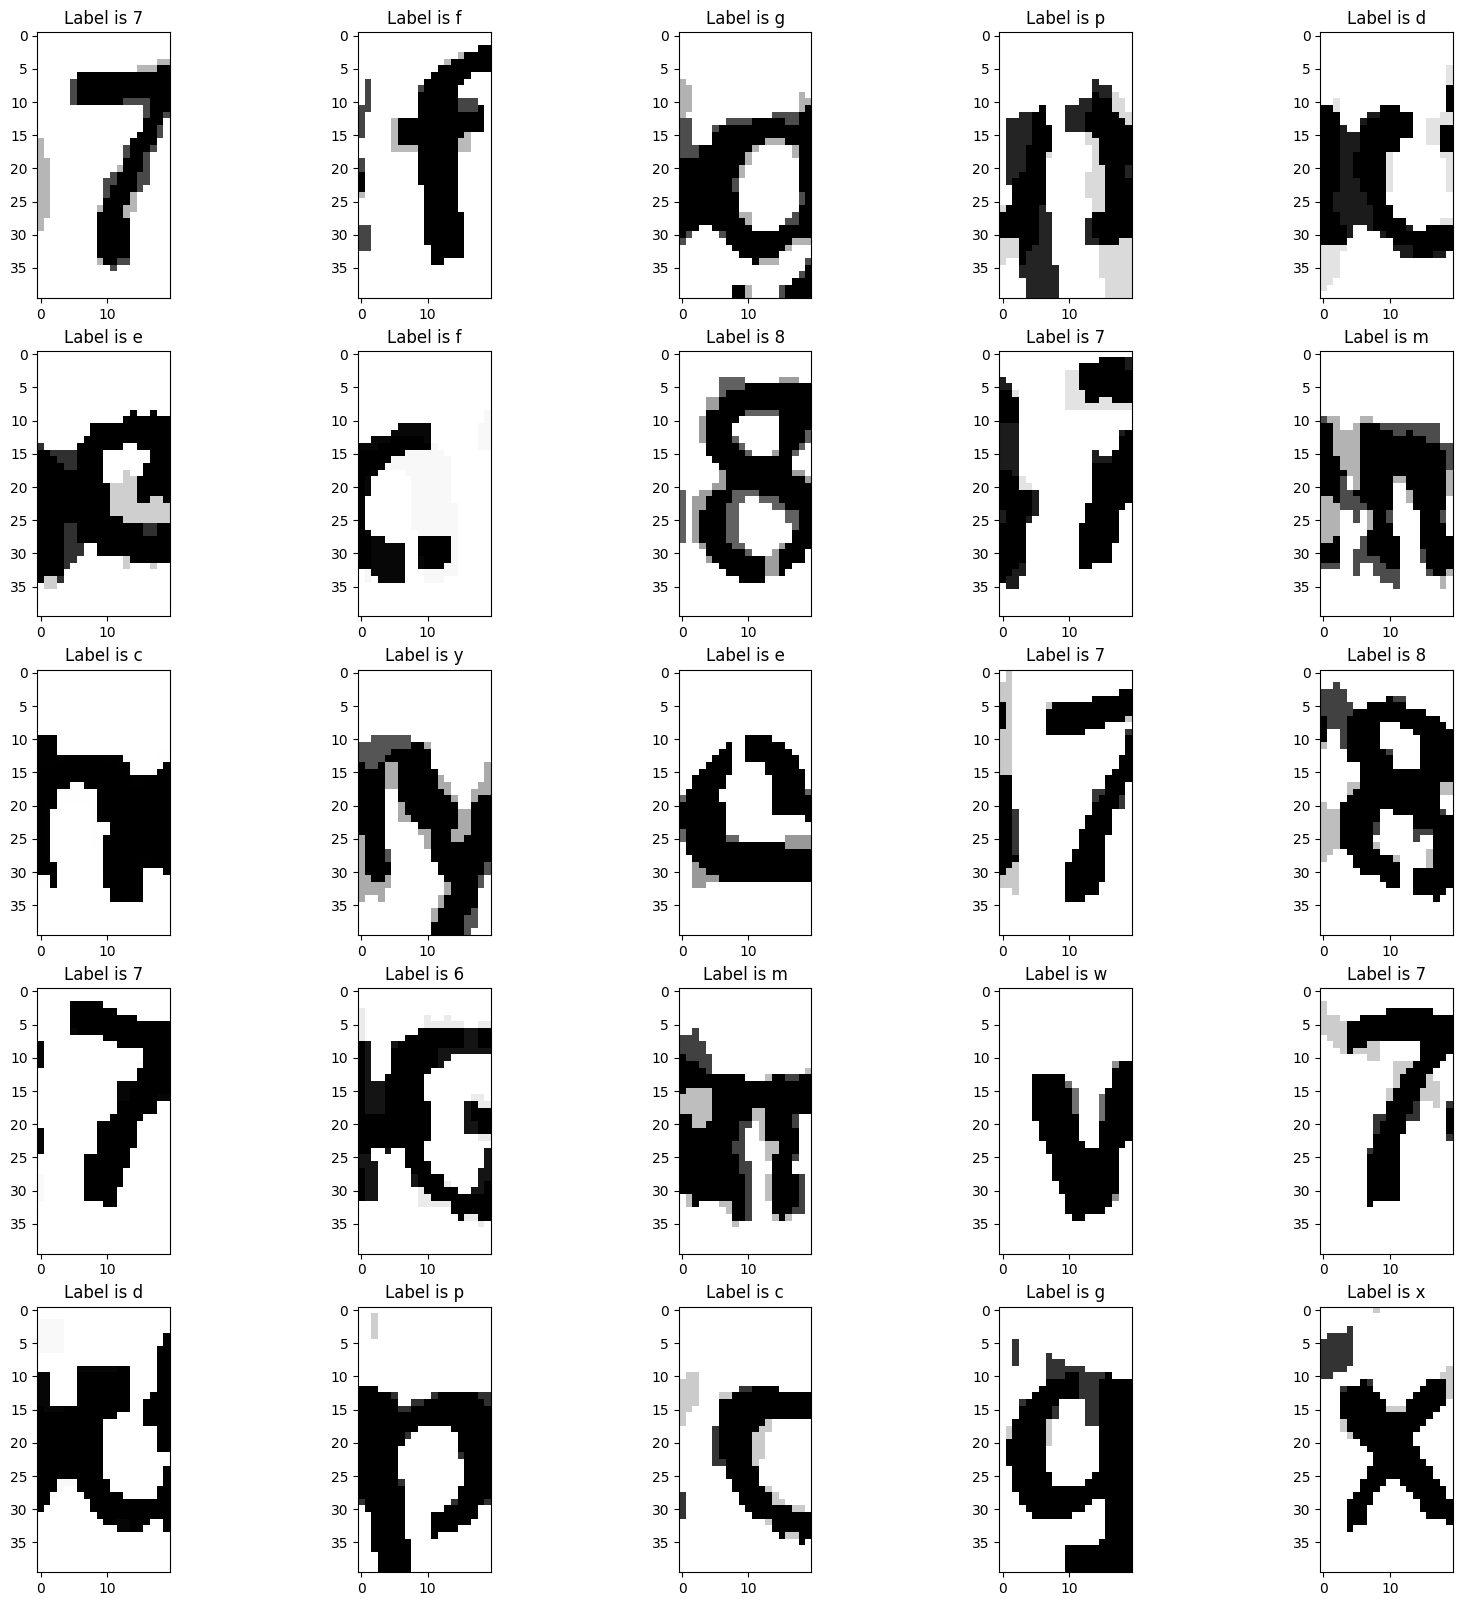

In [ ]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()


In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [ ]:
train_set = traingen.flow(X_train, y_train)


In [ ]:
trainX, trainy = next(train_set)


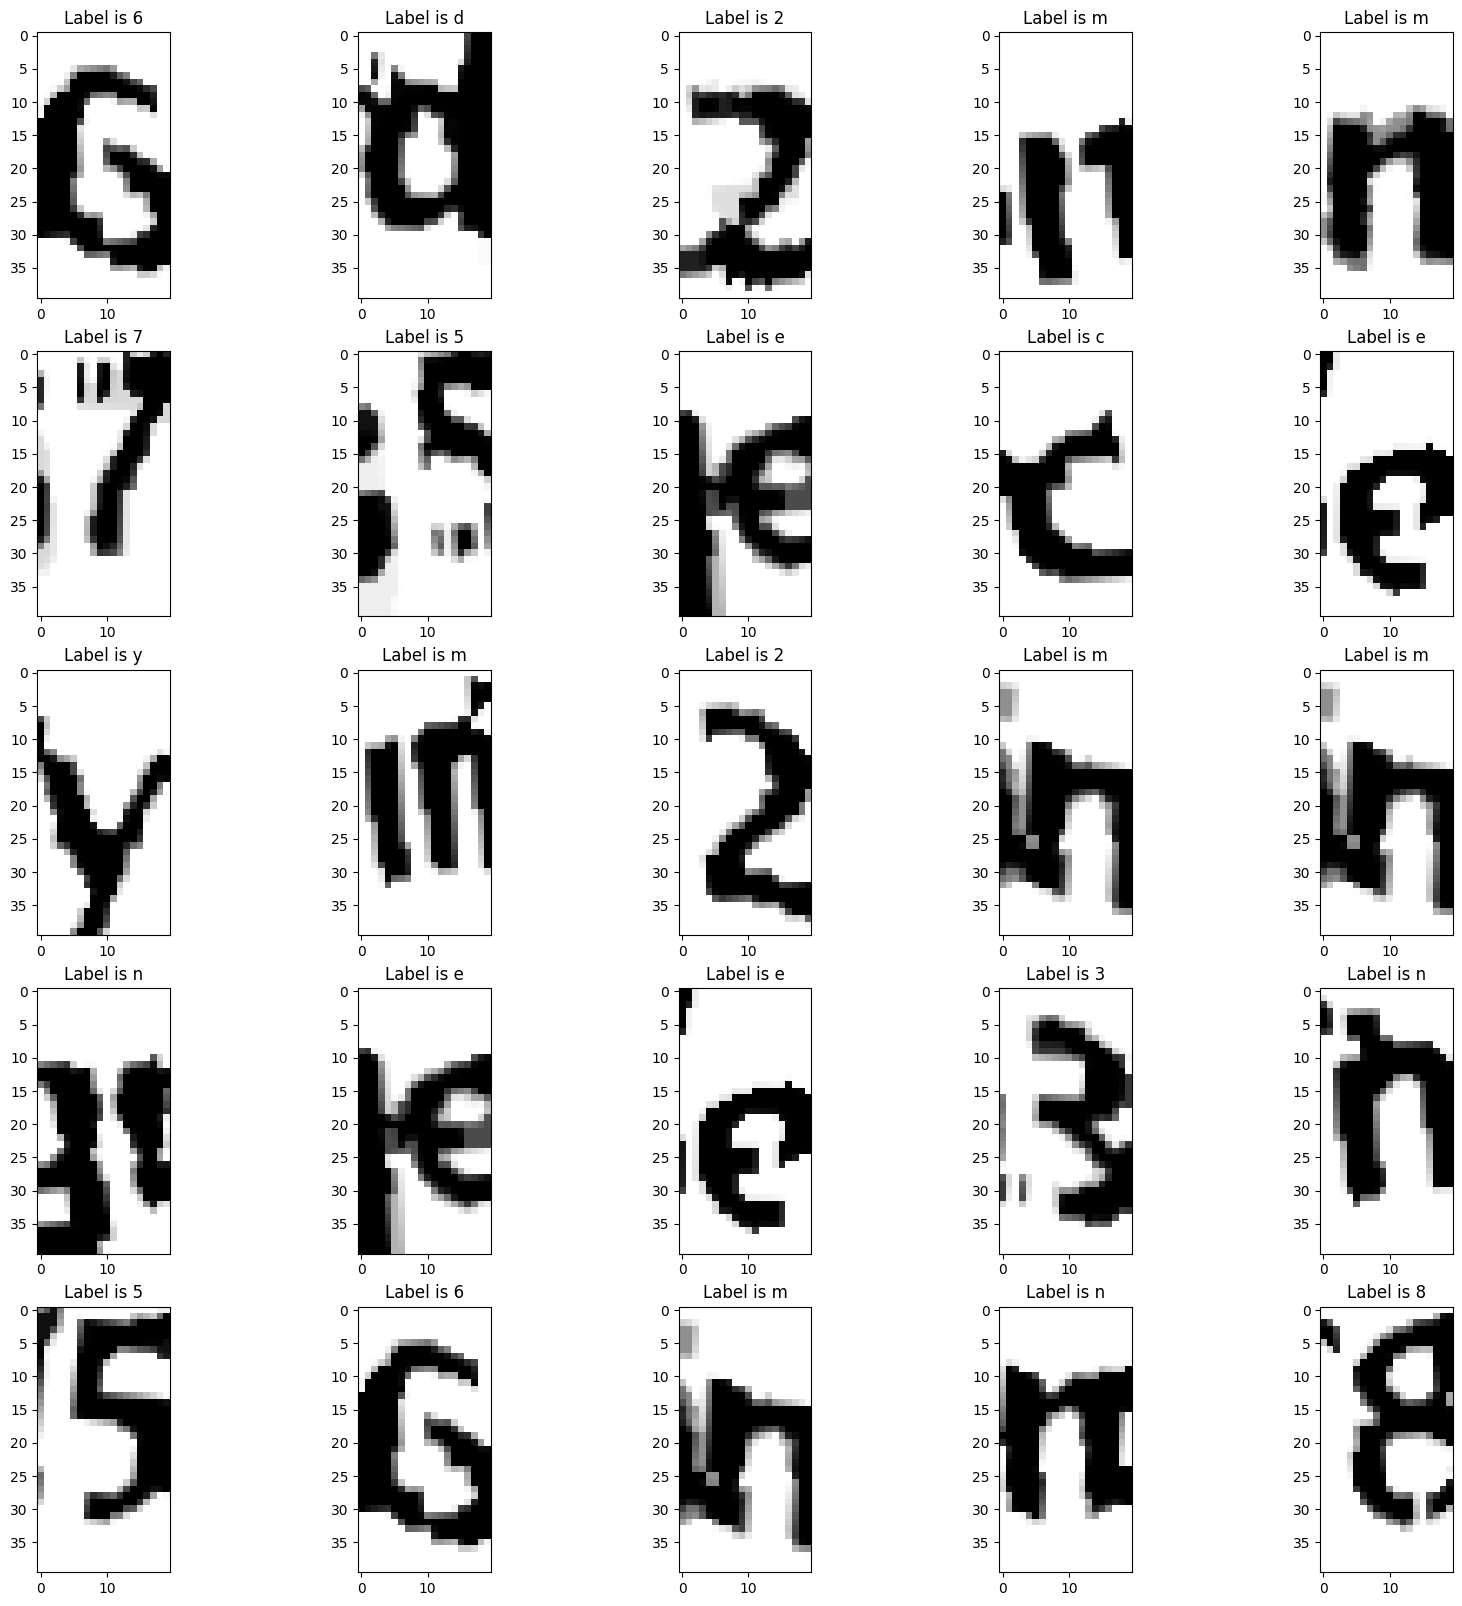

In [ ]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 20, 10, 128)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 10, 5, 32)           │          37,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 5, 3, 16)            │           4,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32)                  │           7,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,155 (207.64 KB)

 Trainable params: 52,675 (205.76 KB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)


In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(7904, 40, 20, 1)
(7904, 19)


In [ ]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = int(len(X_train)/32), callbacks = [checkp])


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1719 - loss: 2.8622
Epoch 1: val_loss improved from inf to 3.67001, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.1732 - loss: 2.8568 - val_accuracy: 0.0731 - val_loss: 3.6700
Epoch 2/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5152 - loss: 1.6257
Epoch 2: val_loss improved from 3.67001 to 2.20848, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5159 - loss: 1.6234 - val_accuracy: 0.3933 - val_loss: 2.2085
Epoch 3/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6701 - loss: 1.1522
Epoch 3: val_loss improved from 2.20848 to 0.98448, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6704 - loss: 1.1514 - val_accuracy: 0.7279 - val_loss: 0.9845
Epoch 4/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7252 - loss: 0.9385
Epoch 4: val_loss improved from 0.98448 to 0.74988, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7254 - loss: 0.9378 - val_accuracy: 0.7760 - val_loss: 0.7499
Epoch 5/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7702 - loss: 0.7928
Epoch 5: val_loss improved from 0.74988 to 0.63177, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7703 - loss: 0.7926 - val_accuracy: 0.8058 - val_loss: 0.6318
Epoch 6/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7794 - loss: 0.7415
Epoch 6: val_loss did not improve from 0.63177
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7795 - loss: 0.7413 - val_accuracy: 0.8000 - val_loss: 0.7220
Epoch 7/150
243/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8150 - loss: 0.6664
Epoch 7: val_loss did not improve from 0.63177
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8149 - loss: 0.6662 - val_accuracy: 0.8010 - val_loss: 0.6934
Epoch 8/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7995 - loss: 0.6604
Epoch 8: val_loss did not improve from 0.63177
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7997 - loss: 0.6599 - val_accuracy: 0.8250 - val_loss: 0.6631
Epoch 9/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8247 - loss: 0.5758
Epoch 9: val_loss improved from 0.6

247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8247 - loss: 0.5760 - val_accuracy: 0.8125 - val_loss: 0.6088
Epoch 10/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8430 - loss: 0.5411
Epoch 10: val_loss did not improve from 0.60881
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8430 - loss: 0.5413 - val_accuracy: 0.8173 - val_loss: 0.6388
Epoch 11/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8390 - loss: 0.5681
Epoch 11: val_loss did not improve from 0.60881
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8390 - loss: 0.5678 - val_accuracy: 0.8135 - val_loss: 0.6602
Epoch 12/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8504 - loss: 0.5425
Epoch 12: val_loss improved from 0.60881 to 0.56153, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8503 - loss: 0.5423 - val_accuracy: 0.8337 - val_loss: 0.5615
Epoch 13/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8434 - loss: 0.5187
Epoch 13: val_loss improved from 0.56153 to 0.51795, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8435 - loss: 0.5188 - val_accuracy: 0.8471 - val_loss: 0.5180
Epoch 14/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8639 - loss: 0.4502
Epoch 14: val_loss did not improve from 0.51795
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8639 - loss: 0.4505 - val_accuracy: 0.8087 - val_loss: 0.6647
Epoch 15/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8557 - loss: 0.4946
Epoch 15: val_loss did not improve from 0.51795
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8558 - loss: 0.4945 - val_accuracy: 0.8558 - val_loss: 0.5340
Epoch 16/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8730 - loss: 0.4534
Epoch 16: val_loss did not improve from 0.51795
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8729 - loss: 0.4535 - val_accuracy: 0.8308 - val_loss: 0.5329
Epoch 17/150
243/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8622 - loss: 0.4595
Epoch 17: val_loss did not i

247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8797 - loss: 0.4233 - val_accuracy: 0.8385 - val_loss: 0.4949
Epoch 21/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8811 - loss: 0.4076
Epoch 21: val_loss did not improve from 0.49487
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8809 - loss: 0.4081 - val_accuracy: 0.8327 - val_loss: 0.6291
Epoch 22/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8739 - loss: 0.4324
Epoch 22: val_loss did not improve from 0.49487
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8739 - loss: 0.4324 - val_accuracy: 0.8529 - val_loss: 0.5375
Epoch 23/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8814 - loss: 0.4010
Epoch 23: val_loss did not improve from 0.49487
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8813 - loss: 0.4011 - val_accuracy: 0.8548 - val_loss: 0.5699
Epoch 24/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8774 - loss: 0.4065
Epoch 24: val_loss did not i

247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8844 - loss: 0.3857 - val_accuracy: 0.8625 - val_loss: 0.4840
Epoch 27/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8923 - loss: 0.3749
Epoch 27: val_loss did not improve from 0.48397
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8923 - loss: 0.3751 - val_accuracy: 0.8548 - val_loss: 0.5426
Epoch 28/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8923 - loss: 0.3771
Epoch 28: val_loss improved from 0.48397 to 0.48244, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8922 - loss: 0.3771 - val_accuracy: 0.8673 - val_loss: 0.4824
Epoch 29/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8824 - loss: 0.3979
Epoch 29: val_loss improved from 0.48244 to 0.46822, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8824 - loss: 0.3978 - val_accuracy: 0.8673 - val_loss: 0.4682
Epoch 30/150
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8877 - loss: 0.3751
Epoch 30: val_loss did not improve from 0.46822
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8877 - loss: 0.3751 - val_accuracy: 0.8413 - val_loss: 0.5124
Epoch 31/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8839 - loss: 0.3686
Epoch 31: val_loss did not improve from 0.46822
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8839 - loss: 0.3686 - val_accuracy: 0.8260 - val_loss: 0.5560
Epoch 32/150
243/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8993 - loss: 0.3397
Epoch 32: val_loss did not improve from 0.46822
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8992 - loss: 0.3403 - val_accuracy: 0.8577 - val_loss: 0.4729
Epoch 33/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8944 - loss: 0.3477
Epoch 33: val_loss did not i

247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9013 - loss: 0.3172 - val_accuracy: 0.8731 - val_loss: 0.4616
Epoch 44/150
243/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8984 - loss: 0.3105
Epoch 44: val_loss did not improve from 0.46157
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8985 - loss: 0.3106 - val_accuracy: 0.8625 - val_loss: 0.4930
Epoch 45/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9021 - loss: 0.3238
Epoch 45: val_loss did not improve from 0.46157
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9021 - loss: 0.3238 - val_accuracy: 0.8481 - val_loss: 0.5505
Epoch 46/150
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9024 - loss: 0.3201
Epoch 46: val_loss did not improve from 0.46157
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9024 - loss: 0.3201 - val_accuracy: 0.8481 - val_loss: 0.4934
Epoch 47/150
244/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9050 - loss: 0.3052
Epoch 47: val_loss did not i

247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9065 - loss: 0.2937 - val_accuracy: 0.8702 - val_loss: 0.4583
Epoch 57/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9094 - loss: 0.2916
Epoch 57: val_loss did not improve from 0.45828
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9094 - loss: 0.2916 - val_accuracy: 0.8442 - val_loss: 0.5276
Epoch 58/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9130 - loss: 0.2914
Epoch 58: val_loss improved from 0.45828 to 0.45182, saving model to ./result_model.h5


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9130 - loss: 0.2915 - val_accuracy: 0.8683 - val_loss: 0.4518
Epoch 59/150
246/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9112 - loss: 0.2942
Epoch 59: val_loss did not improve from 0.45182
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9111 - loss: 0.2942 - val_accuracy: 0.8365 - val_loss: 0.5207
Epoch 60/150
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9131 - loss: 0.3030
Epoch 60: val_loss did not improve from 0.45182
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9131 - loss: 0.3031 - val_accuracy: 0.8538 - val_loss: 0.4908
Epoch 61/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9090 - loss: 0.2949
Epoch 61: val_loss did not improve from 0.45182
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9090 - loss: 0.2950 - val_accuracy: 0.8663 - val_loss: 0.4772
Epoch 62/150
245/247 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9127 - loss: 0.2763
Epoch 62: val_loss did not i

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

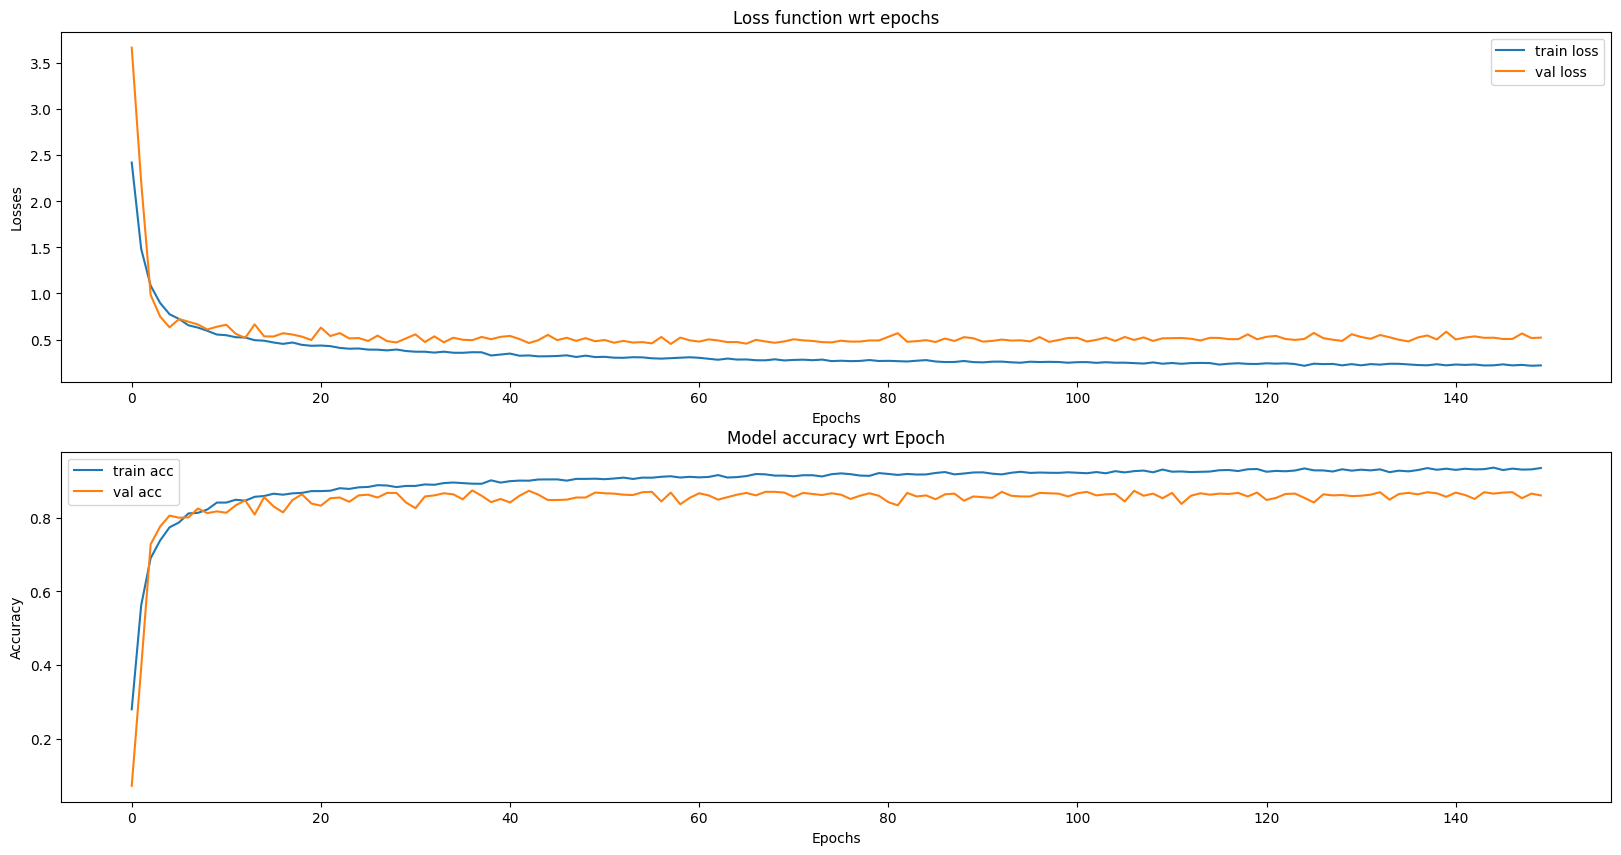

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('./result_model.h5')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 20, 10, 128)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 10, 5, 32)           │          37,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 5, 3, 16)            │           4,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32)                  │           7,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,157 (207.65 KB)

 Trainable params: 52,675 (205.76 KB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])


In [ ]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))


Accuracy : 0.8682692307692308
              precision    recall  f1-score   support

           2       0.88      0.96      0.92        53
           3       1.00      0.89      0.94        62
           4       0.94      0.92      0.93        49
           5       0.96      0.96      0.96        51
           6       0.92      0.84      0.88        55
           7       0.91      0.93      0.92        43
           8       0.98      0.98      0.98        50
           b       0.88      0.96      0.91        45
           c       0.85      0.74      0.80        47
           d       0.88      0.82      0.84        60
           e       0.81      0.86      0.83        50
           f       0.90      0.93      0.91        67
           g       0.92      0.93      0.92        58
           m       0.71      0.54      0.62        74
           n       0.70      0.84      0.76       109
           p       0.97      0.87      0.92        38
           w       0.72      0.93      0.81        

In [ ]:
def get_demo (img_path) :

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))

    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0

    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)

    for res in ydemo :
        print(info[res])
    print(img_path[-9:])


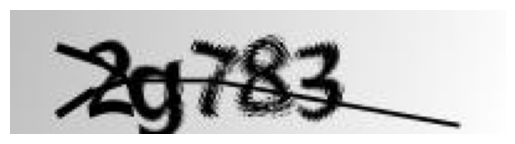

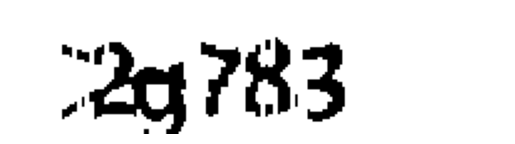

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
2
g
7
8
3
2g783.png


In [ ]:
get_demo('./captcha_images_v2/2g783.png')
# get_demo('../input/captcha-version-2-images/samples/2fxgd.png')
# get_demo('../input/captcha-version-2-images/samples/88bgx.png')
# get_demo('../input/captcha-version-2-images/samples/4yc85.png')

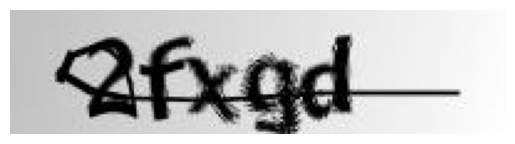

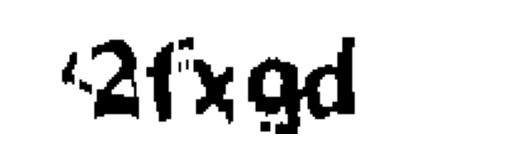

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2
f
x
g
d
2fxgd.png


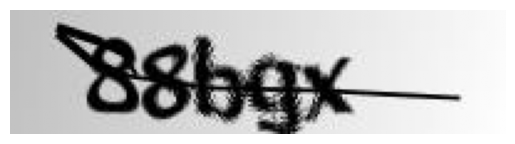

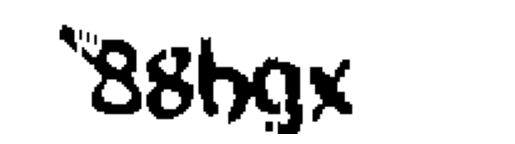

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
8
8
b
g
x
88bgx.png


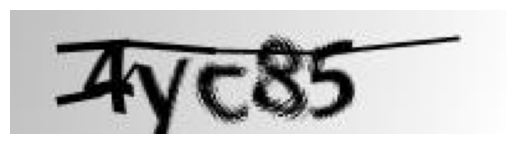

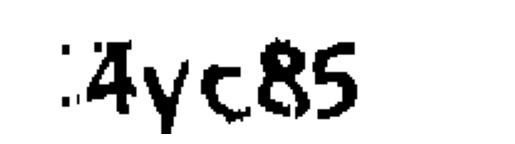

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4
y
c
8
5
4yc85.png


In [ ]:
get_demo('./captcha_images_v2/2fxgd.png')
get_demo('./captcha_images_v2/88bgx.png')
get_demo('./captcha_images_v2/4yc85.png')